In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import Utils
from GraphManager import GraphManager
import DataLoader
import pandas as pd
import torch_geometric.utils
import networkx as nx

In [6]:
DATA_COLUMNS = ['league', 'season', 'week', 'home_team', 'away_team', 'result', 'home_lineup', 'away_lineup']
dataset: pd.DataFrame = pd.read_csv(
            'data/KaggleDataset.csv',
            encoding='utf-8',
            usecols=DATA_COLUMNS,
            dtype=dict(zip(DATA_COLUMNS, [str]*2 + [int] + [str]*5))
        )

In [7]:
league_names = []
base_line = []
for league, league_df in dataset.groupby('league'):
    league_names.append(league)
    base_line.append(max(
        league_df.loc[league_df["result"] == "win"].shape[0] / league_df.shape[0],
        league_df.loc[league_df["result"] == "tie"].shape[0] / league_df.shape[0],
        league_df.loc[league_df["result"] == "loss"].shape[0] / league_df.shape[0]
    ))
    print(league)
    print(f'Win: {league_df.loc[league_df["result"] == "win"].shape[0] / league_df.shape[0]}')
    print(f'Tie: {league_df.loc[league_df["result"] == "tie"].shape[0] / league_df.shape[0]}')
    print(f'Loss: {league_df.loc[league_df["result"] == "loss"].shape[0] / league_df.shape[0]}')

Belgium Jupiler League
Win: 0.4670510708401977
Tie: 0.2471169686985173
Loss: 0.285831960461285
England Premier League
Win: 0.45519107203246534
Tie: 0.258369969563747
Loss: 0.28643895840378764
France Ligue 1
Win: 0.45022703457911284
Tie: 0.2804750261962976
Loss: 0.2692979392245896
Germany 1. Bundesliga
Win: 0.45366470092670597
Tie: 0.2434709351305813
Loss: 0.3028643639427127
Italy Serie A
Win: 0.46586345381526106
Tie: 0.2628696604600219
Loss: 0.2712668857247171
Netherlands Eredivisie
Win: 0.4732186732186732
Tie: 0.23538083538083537
Loss: 0.2914004914004914
Poland Ekstraklasa
Win: 0.4626865671641791
Tie: 0.2771855010660981
Loss: 0.2601279317697228
Portugal Liga ZON Sagres
Win: 0.44417862838915473
Tie: 0.259170653907496
Loss: 0.2966507177033493
Scotland Premier League
Win: 0.42503259452411996
Tie: 0.23728813559322035
Loss: 0.3376792698826597
Spain LIGA BBVA
Win: 0.48439821693907875
Tie: 0.23439821693907875
Loss: 0.2812035661218425
Switzerland Super League
Win: 0.45161290322580644
Tie: 0.2

In [6]:
epoch_per_league = 100
with open(f'{Utils.GLOBALS.LoadPath.value}lists.pl', 'rb') as pf:
        loss_list, train_acc_list, eval_acc_list = pickle.load(pf)

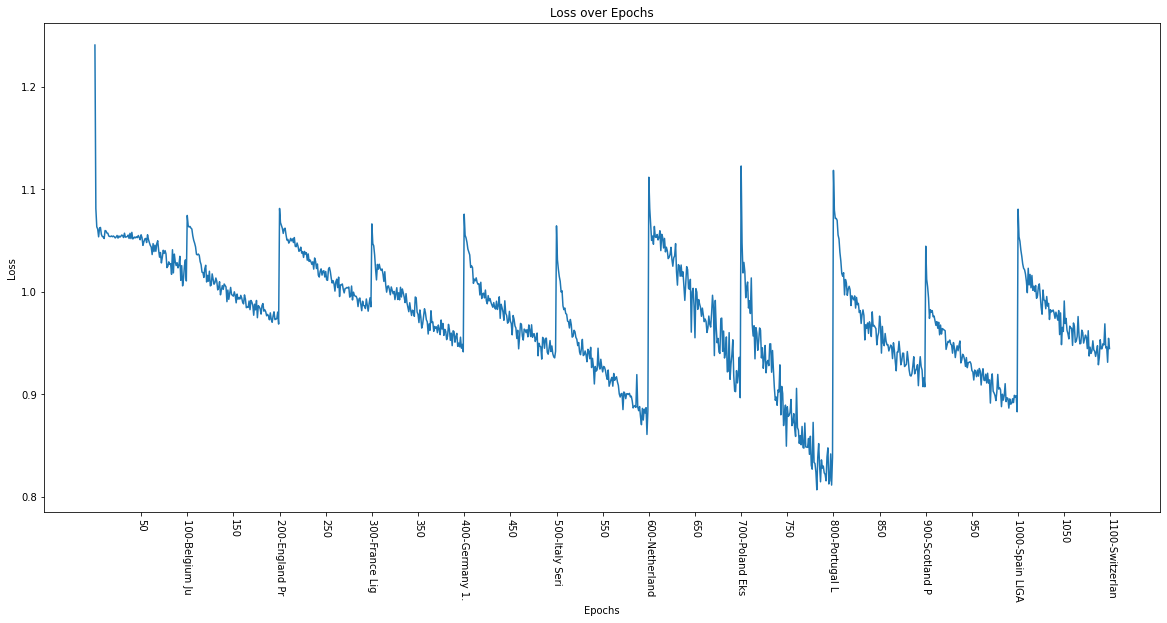

In [9]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(loss_list)), np.array(loss_list))
xts = np.arange(epoch_per_league//2, len(eval_acc_list)+1, epoch_per_league//2)
ax.set_xticks(xts)
ax.set_xticklabels([f'{xts[i]}-{league_names[i//2][:10]}' if xts[i]%epoch_per_league == 0 else f'{xts[i]}' for i in range(xts.shape[0])], rotation=-90)
ax.set_title('Loss over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
fig.set_size_inches((20, 9))

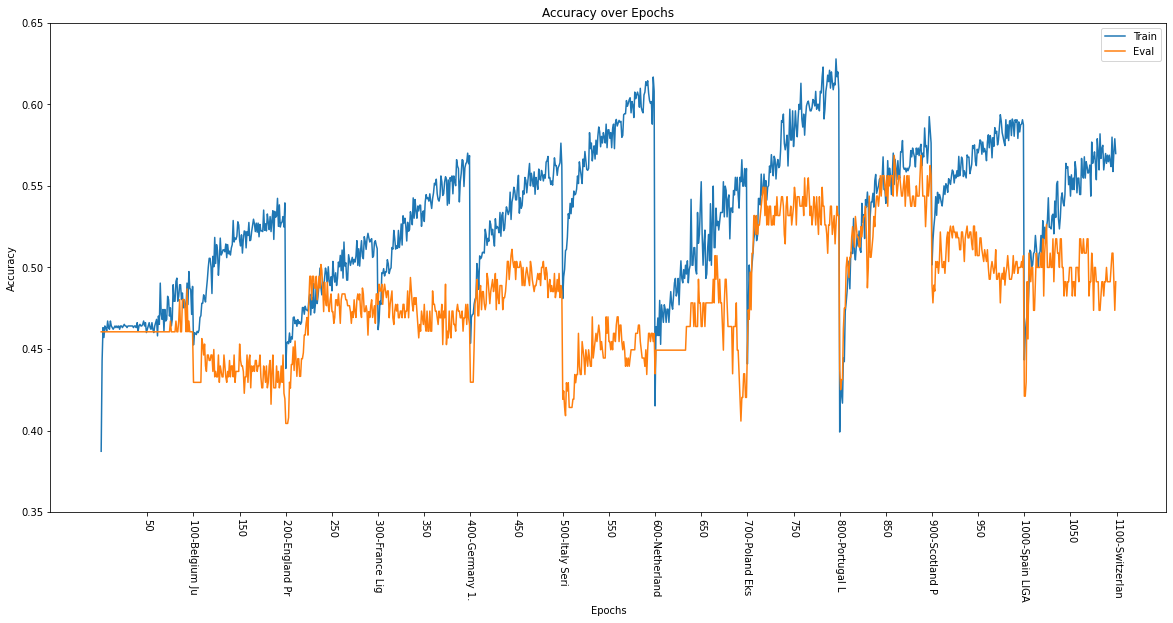

In [10]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(train_acc_list)), np.array(train_acc_list), label='Train')
ax.plot(np.arange(len(eval_acc_list)), np.array(eval_acc_list), label='Eval')
xts = np.arange(epoch_per_league//2, len(eval_acc_list)+1, epoch_per_league//2)
ax.set_xticks(xts)
ax.set_xticklabels([f'{xts[i]}-{league_names[i//2][:10]}' if xts[i]%epoch_per_league == 0 else f'{xts[i]}' for i in range(xts.shape[0])], rotation=-90)
ax.legend()
ax.set_ylim((.35, .65))
ax.set_title('Accuracy over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
fig.set_size_inches((20, 9))


In [10]:
test_accuracy = np.array([
    [0.521, 0.420, 0.500, 0.532, 0.493, 0.458, 0.310, 0.526, 0.474, 0.544, 0.551],
    [0.452, 0.433, 0.486, 0.484, 0.500, 0.495, 0.448, 0.539, 0.513, 0.524, 0.551]
])
test_accuracy = np.max(test_accuracy, axis=0)

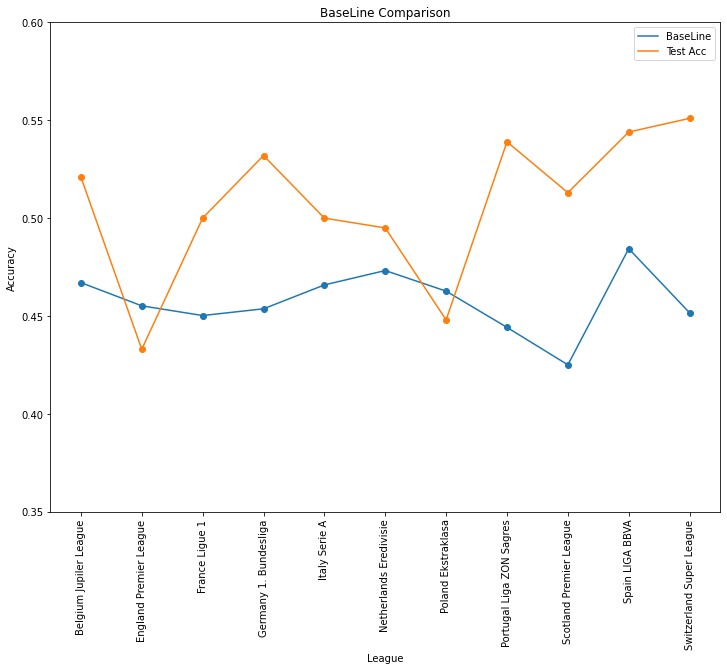

In [21]:
fig, ax = plt.subplots()
x = np.arange(1, test_accuracy.shape[0] + 1)
ax.plot(x, base_line, label='BaseLine')
ax.plot(x, test_accuracy, label='Test Acc')
ax.scatter(x, base_line)
ax.scatter(x, test_accuracy)
ax.set_xticks(x)
ax.set_xticklabels(league_names, rotation=90)
ax.set_ylim((.35, .6))
ax.legend()
ax.set_title('BaseLine Comparison')
ax.set_xlabel('League')
ax.set_ylabel('Accuracy')
fig.set_size_inches((12, 9))

In [3]:
dl = DataLoader.DataLoader('data/KaggleDataset.csv', 11)
gm = GraphManager(dl, 'cpu')
ht = gm._gen_heterodata(
    dl.dataset.loc[[0,1, 2, 3], :],
    supervision_indcs=[3],
    remove_supervision_links=True
)

In [104]:
dl.dataset.loc[[0,1,2,3], :]

,league,season,week,home_team,away_team,result,home_lineup,away_lineup
0,Belgium Jupiler League,2008/2009,24,KV Mechelen,KRC Genk,win,"[Wouter Biebauw, Kenny van Hoevelen, Nana Asar...","[Davino Verhulst, Joao Carlos, Dimitri Daesela..."
1,Belgium Jupiler League,2008/2009,25,KSV Cercle Brugge,Club Brugge KV,loss,"[Bram Verbist, Denis Viane, Anthony Portier, F...","[Stijn Stijnen, Michael Klukowski, Antolin Alc..."
2,Belgium Jupiler League,2008/2009,25,RSC Anderlecht,SV Zulte-Waregem,win,"[Davy Schollen, Olivier Deschacht, Arnold Krui...","[Sammy Bossuyt, Karel D'Haene, Stijn Minne, Ba..."
3,Belgium Jupiler League,2008/2009,26,KV Mechelen,RSC Anderlecht,win,"[Wouter Biebauw, Kenny van Hoevelen, Nana Asar...","[Davy Schollen, Olivier Deschacht, Roland Juha..."


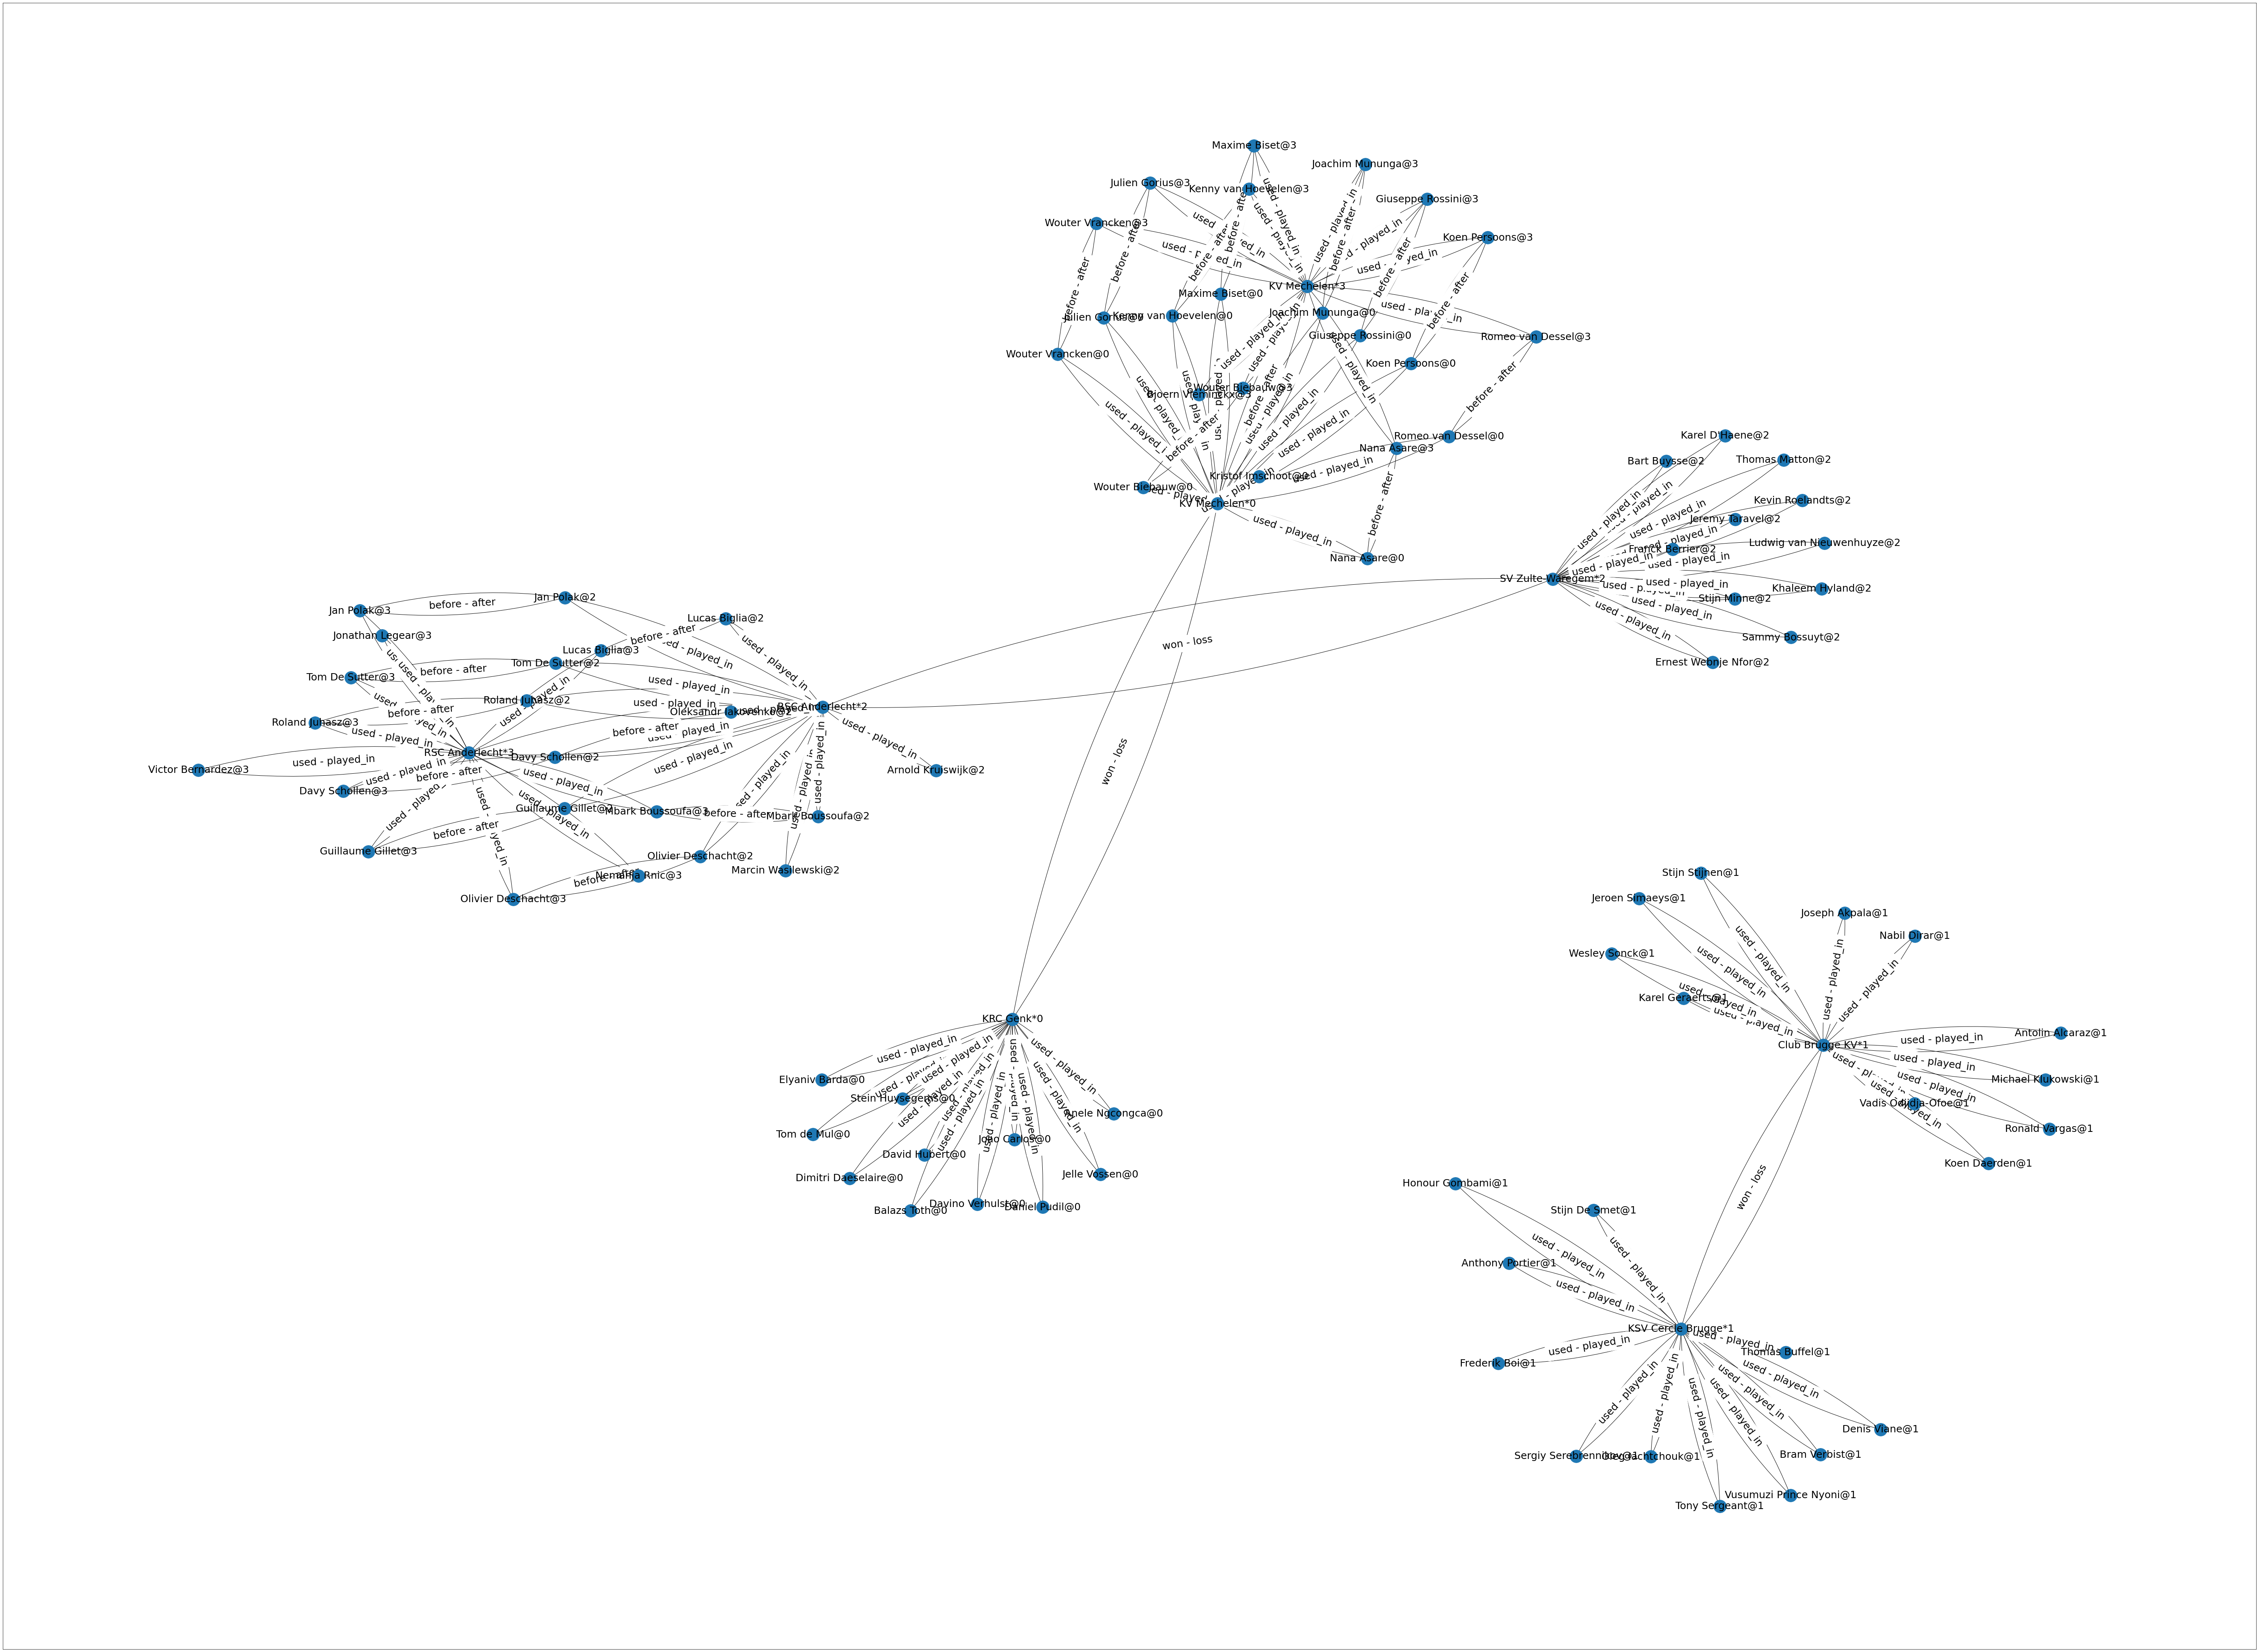

In [4]:
hm = ht.to_homogeneous()
g = torch_geometric.utils.to_networkx(hm)
pos = nx.spring_layout(g, k=0.2)  # positions for all nodes


node_labels = {}
node_text = hm.team_node_ids.index.to_list() + hm.player_node_ids.index.to_list()
for i, n in enumerate(hm.node_type.cpu().numpy()):
    # node_labels[i] = 'team' if n==0 else 'player'
    node_labels[i] = node_text[i]


edge_list = hm.edge_index.T.cpu().tolist()
edge_labels = {}
for i, e in enumerate(hm.edge_type.cpu().numpy()):
    if e==0 or e==1: edge_labels[tuple(edge_list[i])] = 'used - played_in'
    elif e==2 or e==3: edge_labels[tuple(edge_list[i])] = 'won - loss'
    elif e==4 or e==5 or e==6 or e==7: edge_labels[tuple(edge_list[i])] = 'before - after'

fig, ax = plt.subplots()
nx.draw_networkx_nodes(
    g,
    ax=ax,
    node_size=1000,
    pos=pos)
nx.draw_networkx_labels(g,pos=pos, ax=ax, labels=node_labels, font_size=25)
nx.draw_networkx_edges(g, pos, ax=ax, connectionstyle='arc3,rad=0.1')
nx.draw_networkx_edge_labels(g, pos=pos, ax=ax, edge_labels=edge_labels, font_size=25)
fig.set_size_inches((100, 75))
fig.savefig('a.png', dpi=75)